#                   ---------------------Facial Emotion Classification-------------------------

## 1. Installing dependencies

In [1]:
!pip install tensorflow==2.8.0 opencv-python matplotlib

In [2]:
import cv2
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

## 2. Data pipeline

In [3]:
data_dir = 'data'

In [4]:
image_exts = [ 'jpeg' , 'jpg' , 'bmp' , 'png' ]

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\depressed\-of-frustrated-upset-sad-depressed-man-sitting-3d-white-people-man-character.jpg
Issue with image data\depressed\-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg
Issue with image data\depressed\0223_637061286409478962.jpg
Issue with image data\depressed\0x0.jpg
Issue with image data\depressed\1000_F_124527256_XeXO1Q7xiE39ZcnuCOHTCotlj7p1FYwc.jpg
Issue with image data\depressed\1000_F_138020129_45Aelc3wI4IXWRdKJVInh8vDYXuOKEtE.jpg
Issue with image data\depressed\1000_F_188341825_cOJfcEPv3pPzmi1gqYbiYWtCS2amI3el.jpg
Issue with image data\depressed\1000_F_226074800_9E3uskBOPUQgEkKS5fGdEVma4DnWf93e.jpg
Issue with image data\depressed\1000_F_452957465_ZDlbGO5mwQ4LisGrusfhuFwYDG2by4lc.jpg
Issue with image data\depressed\10130943734_6ff3aaf816_b - Copy.jpg
Issue with image data\depressed\107188144-1675355909384-gettyimages-1302154722-dsc_9175.jpeg
Issue with image data\depressed\10a591b8deabc7d2b4f0de3d98f9169b.jpg
Issue with ima

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 464 files belonging to 2 classes.


In [7]:
data_itrn = data.as_numpy_iterator()

In [8]:
batch = data_itrn.next()

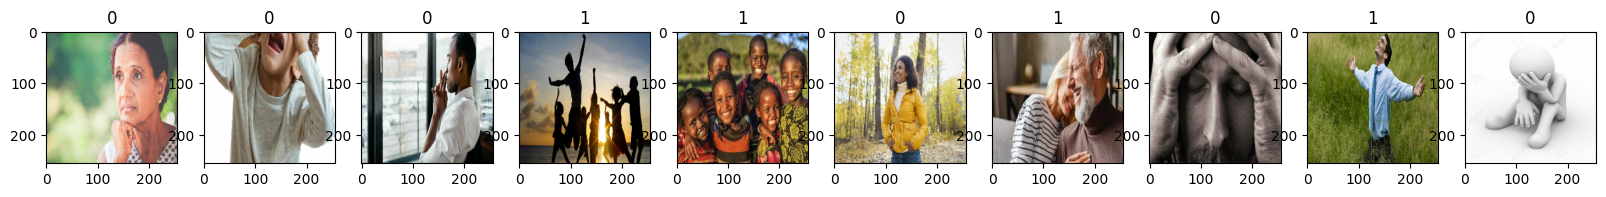

In [9]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
       ax[idx].imshow(img.astype(int))
       ax[idx].title.set_text(batch[1][idx])


## Preprocessing data pipeline

In [10]:
batch[0].shape ##image

(32, 256, 256, 3)

In [11]:
scale = (batch[0]/256).max()
#batch[0].max()
scale

0.99609375

In [12]:
data = data.map(lambda x,y: (x/255, y))
# transformation to data in pipeline

In [13]:
data.as_numpy_iterator().next()


(array([[[[0.00000000e+00, 2.49373494e-03, 7.84313772e-03],
          [0.00000000e+00, 0.00000000e+00, 7.84313772e-03],
          [0.00000000e+00, 5.10110287e-03, 5.29258559e-03],
          ...,
          [0.00000000e+00, 2.55055143e-03, 0.00000000e+00],
          [6.89577602e-04, 7.31763663e-04, 8.65343865e-03],
          [1.03184447e-01, 1.18279703e-01, 1.39686227e-01]],
 
         [[0.00000000e+00, 4.00229066e-04, 8.24336614e-03],
          [0.00000000e+00, 5.91592223e-04, 8.43472965e-03],
          [3.88560584e-04, 4.92140837e-03, 5.50145190e-03],
          ...,
          [8.35463579e-04, 3.38601507e-03, 1.25319534e-03],
          [1.69970933e-02, 1.65203921e-02, 2.68564560e-02],
          [1.76922366e-01, 2.05250397e-01, 2.34560534e-01]],
 
         [[9.95710841e-04, 3.95151787e-03, 1.17946547e-02],
          [9.72373800e-06, 3.90271959e-03, 1.17458571e-02],
          [1.90295046e-03, 3.92156886e-03, 7.95880519e-03],
          ...,
          [1.01631312e-02, 1.30617926e-02, 1.5196

## Split data for train and test

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size


10

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Convolutional Neural Network (CNN)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
10/10 [==============================] - 24s 2s/step - loss: 0.2632 - accuracy: 0.8875 - val_loss: 0.3004 - val_accuracy: 0.8438
Epoch 2/50
10/10 [==============================] - 27s 2s/step - loss: 0.2184 - accuracy: 0.9250 - val_loss: 0.1840 - val_accuracy: 0.9479
Epoch 3/50
10/10 [==============================] - 26s 2s/step - loss: 0.1591 - accuracy: 0.9500 - val_loss: 0.1808 - val_accuracy: 0.9271
Epoch 4/50
10/10 [==============================] - 25s 2s/step - loss: 0.1150 - accuracy: 0.9625 - val_loss: 0.1322 - val_accuracy: 0.9583
Epoch 5/50
10/10 [==============================] - 28s 2s/step - loss: 0.0931 - accuracy: 0.9656 - val_loss: 0.0822 - val_accuracy: 0.9792
Epoch 6/50
10/10 [==============================] - 25s 2s/step - loss: 0.0783 - accuracy: 0.9781 - val_loss: 0.0817 - val_accuracy: 0.9896
Epoch 7/50
10/10 [==============================] - 25s 2s/step - loss: 0.0874 - accuracy: 0.9688 - val_loss: 0.0967 - val_accuracy: 0.9792
Epoch 8/50
10/10 [==

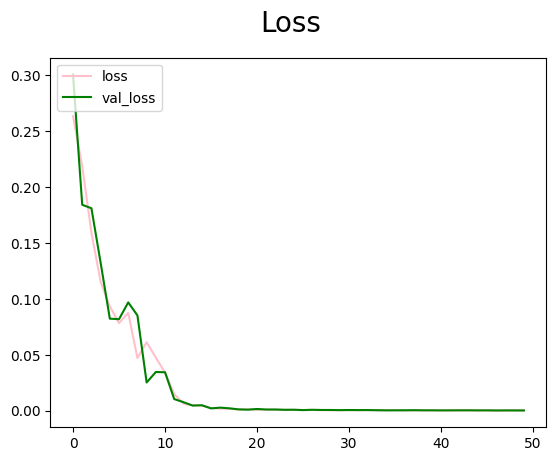

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='pink', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

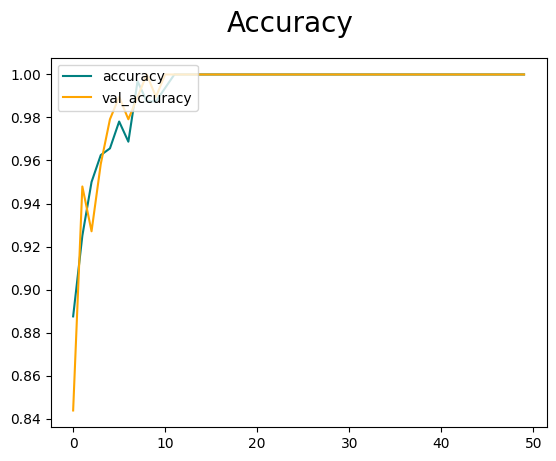

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Validate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 183ms/step


In [59]:
yhat


array([[4.6180157e-10]], dtype=float32)

In [60]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
